# Australian Petrolem Statistics

This notebook is for analysing the [Australian Petroleum Statistics](https://www.energy.gov.au/government-priorities/energy-data/australian-petroleum-statistics) data provided by the [Australian Department of Industry, Science, Energy and Resources](https://energy.gov.au).

The data is provided as an Excel spreadsheet which I'm sure is handy for some very simple analyses and visualisations, but perhaps not the best format for anything requiring any serious manipulation or transformation.

## Standard imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Read and clean up data

### Read from Excel file

The data comes as a set of sheets within the larger Excel document, so let's pull in the whole thing and create a Python dict indexed by the sheet name.

In [150]:
def read_excel(filename):
    """Return a dict of sheet names and the dataframe corresponding to reading
    that sheet with Pandas."""
    return dict(
        [(s, pd.read_excel(filename, sheet_name=s))
         for s in pd.ExcelFile(filename).sheet_names])

stats = read_excel("data/2022/Australian Petroleum Statistics - Data Extract January 2022_0.xlsx")

pd.Series(stats.keys())

0                               Index
1                          Copyright 
2              Data sources and notes
3                Petroleum production
4       Petroleum production by basin
5                 Refinery production
6                   Sales of products
7        Sales by state and territory
8                 Sales of lubricants
9                      Imports volume
10                      Imports value
11          Imports volume by country
12           Imports value by country
13                     Exports volume
14                      Exports value
15          Exports volume by country
16           Exports value by country
17         Destination of LNG exports
18            Stock volume by product
19              Stock mass by product
20                  Consumption cover
21          IEA days net import cover
22      Stock volume incl. on the way
23    Stock IEA days incl. on the way
24             Australian fuel prices
25         OECD fuel prices and taxes
dtype: objec

### Clean up data

* Rename column names to identifers that are more Python-friendly
* Convert the month column to datetime
* Index dataframe by month
* Convert weird "n.a" string in `lng_exports` column to "0" and convert to integers

In [160]:
df = (
    stats['Petroleum production']
    # Rename columns to be better Python names
    .rename(columns={'Crude oil (ML)': 'crude_oil', 
                     'Condensate (ML)': 'condensate',
                     'Crude oil & condensate (ML)': 'crude_oil_and_condensate',
                     'LPG (ML)': 'lpg', 
                     'Natural gas (Mm3)': 'natural_gas',
                     'Natural gas, of which: coal seam gas (Mm3)': 'coal_seam_gas',
                     'LNG exports (Mm3)': 'lng_exports'}))
df = (
  df
    # Convert to time series
    .assign(month=pd.to_datetime(df.Month))
    .set_index(df.Month)
    .drop(columns=['Month'])
    # Set lng_exports "n.a" value to "0"
    .replace('n.a', '0').astype('int64'))

## Make some pretty graphs

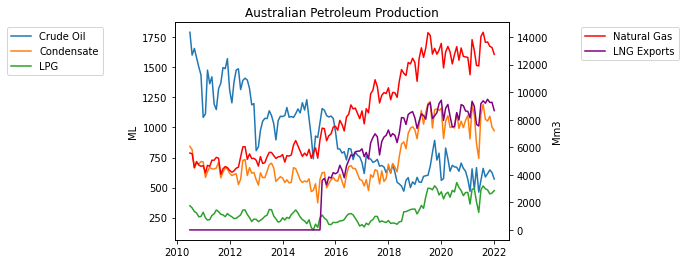

In [156]:
fig, ax = plt.subplots()

ax.plot(df.crude_oil, label='Crude Oil')
ax.plot(df.condensate, label='Condensate')
ax.plot(df.lpg, label='LPG')
ax.plot(y2=df.coal_seam_gas, label='Coal Seam Gas')
ax.set_ylabel('ML')
ax.legend(bbox_to_anchor=(-0.2,1), loc = 'upper right')

ax2=ax.twinx()
ax2.plot(df.natural_gas, label='Natural Gas', color='red')
ax2.plot(df.lng_exports, label='LNG Exports', color='purple')
ax2.set_ylabel('Mm3')
ax2.legend(bbox_to_anchor=(1.2,1), loc = 'upper left')

plt.title('Australian Petroleum Production')
plt.xlabel('Year')

plt.show()